In [46]:
# Importar pandas
import pandas as pd

# Leer el archivo CSV y crear el DataFrame
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

# Mostrar las primeras filas para verificar que se haya cargado correctamente
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [48]:
# Resumen general del DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [50]:
df.describe()


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [52]:
# Valores únicos en columnas categóricas
df['BMI Category'].unique(), df['Sleep Disorder'].unique()

(array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object),
 array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object))

In [42]:
# Ver cuántos nulos hay por columna
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [54]:
# Imputación simple (reemplazar NaN por "No" en 'Chronic Disease')
df.loc[:, 'Sleep Disorder'] = df['Sleep Disorder'].fillna("No disorder")

In [56]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [58]:
# Ver si hay duplicados en Person ID (por ejemplo)
df.duplicated(subset=['Person ID']).sum()

# Eliminar duplicados si existieran
# df.drop_duplicates(subset=['Person ID'], inplace=True)


0

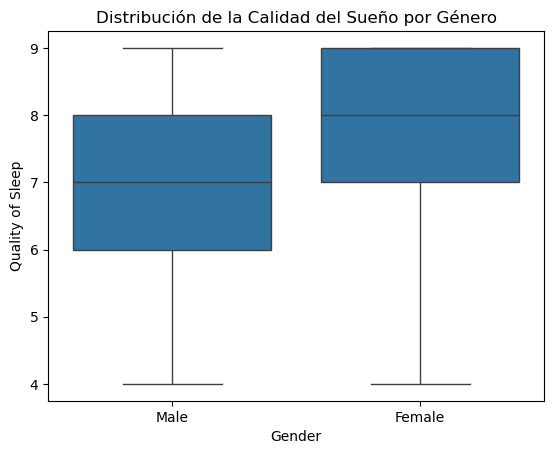

In [70]:
# Comparación GENERAL de la calidad del sueño por género
df.groupby('Gender')['Quality of Sleep'].mean()

# Boxplot para visualizar distribución
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='Gender', y='Quality of Sleep')
plt.title('Distribución de la Calidad del Sueño por Género')
plt.show()


## Luego del sondeo general, comienzo el análisis para la primer pregunta
### ¿ quién tiene peor calidad de sueño, hombres o mujeres?

In [94]:
# Crear columna binaria: 1 = Tiene trastorno, 0 = No tiene
df['Has_Disorder'] = df['Sleep Disorder'].apply(lambda x: 0 if x == 'No disorder' else 1)


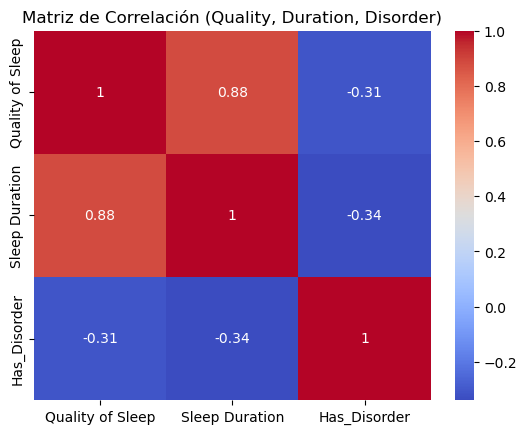

,Quality of Sleep,Sleep Duration,Has_Disorder
Quality of Sleep,1.000000,0.883213,-0.310984
Sleep Duration,0.883213,1.000000,-0.338622
Has_Disorder,-0.310984,-0.338622,1.000000


In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df[['Quality of Sleep', 'Sleep Duration', 'Has_Disorder']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación (Quality, Duration, Disorder)")
plt.show()

corr_matrix


In [100]:
# Segmentación DataFrame en hombres y mujeres
df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']

# Correlación en hombres
corr_male = df_male[['Quality of Sleep', 'Sleep Duration', 'Has_Disorder']].corr()
# Correlación en mujeres
corr_female = df_female[['Quality of Sleep', 'Sleep Duration', 'Has_Disorder']].corr()

print("Correlación (Hombres):\n", corr_male, "\n")
print("Correlación (Mujeres):\n", corr_female)



Correlación (Hombres):
                   Quality of Sleep  Sleep Duration  Has_Disorder
Quality of Sleep          1.000000        0.812399     -0.432021
Sleep Duration            0.812399        1.000000     -0.346139
Has_Disorder             -0.432021       -0.346139      1.000000 

Correlación (Mujeres):
                   Quality of Sleep  Sleep Duration  Has_Disorder
Quality of Sleep          1.000000        0.943502     -0.430473
Sleep Duration            0.943502        1.000000     -0.427554
Has_Disorder             -0.430473       -0.427554      1.000000


In [104]:
import pandas as pd

# Tabla de contingencia
ct = pd.crosstab(df['Gender'], df['Sleep Disorder'])
print(ct)

#en porcentajes:
ct_binary_percent = pd.crosstab(df['Gender'], df['Has_Disorder'], normalize='index') * 100
ct_binary_percent


Sleep Disorder  Insomnia  No disorder  Sleep Apnea
Gender                                            
Female                36           82           67
Male                  41          137           11


Has_Disorder,0,1
Gender,,
Female,44.324324,55.675676
Male,72.486772,27.513228


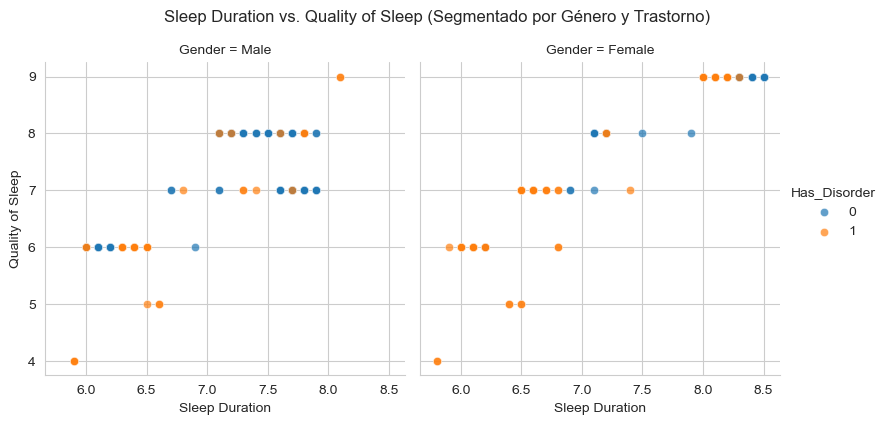

In [106]:
sns.set_style("whitegrid")

# Sleep Duration vs Quality of Sleep, coloreado por Has_Disorder
g = sns.FacetGrid(df, col="Gender", hue="Has_Disorder", height=4)
g.map(sns.scatterplot, "Sleep Duration", "Quality of Sleep", alpha=0.7)
g.add_legend()
g.fig.suptitle("Sleep Duration vs. Quality of Sleep (Segmentado por Género y Trastorno)", y=1.05)
plt.show()


# Como conclusión: Se ve una mayor concentración de puntos en la zona baja de calidad de sueño para hombres con trastorno; por lo tanto, podría concluirse que a partir de los datos de este universo, son los hombres los que tienen una peor calidad de sueño.

Occupation
Sales Representative    4.000000
Scientist               5.000000
Salesperson             6.000000
Software Engineer       6.500000
Doctor                  6.647887
Teacher                 6.975000
Manager                 7.000000
Nurse                   7.369863
Accountant              7.891892
Lawyer                  7.893617
Engineer                8.412698
Name: Quality of Sleep, dtype: float64


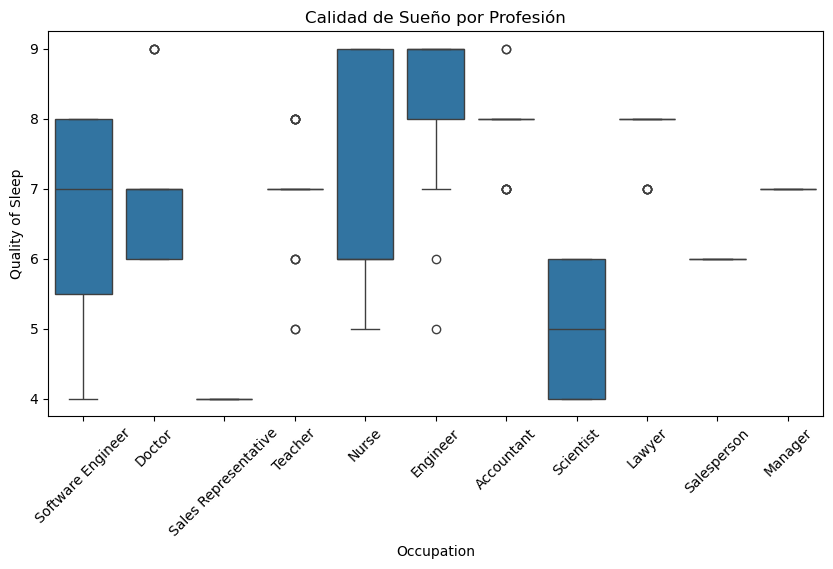

In [72]:
# Calidad de sueño por profesión
profesion_calidad = df.groupby('Occupation')['Quality of Sleep'].mean().sort_values()
print(profesion_calidad)

# Boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Occupation', y='Quality of Sleep')
plt.title('Calidad de Sueño por Profesión')
plt.xticks(rotation=45)
plt.show()


In [118]:
# Primero quiero saber por género cómo está la distribución.
pd.crosstab(df['Occupation'], df['Gender'])

Gender,Female,Male
Occupation,,
Accountant,36,1
Doctor,2,69
Engineer,32,31
Lawyer,2,45
Manager,1,0
Nurse,73,0
Sales Representative,0,2
Salesperson,0,32
Scientist,4,0


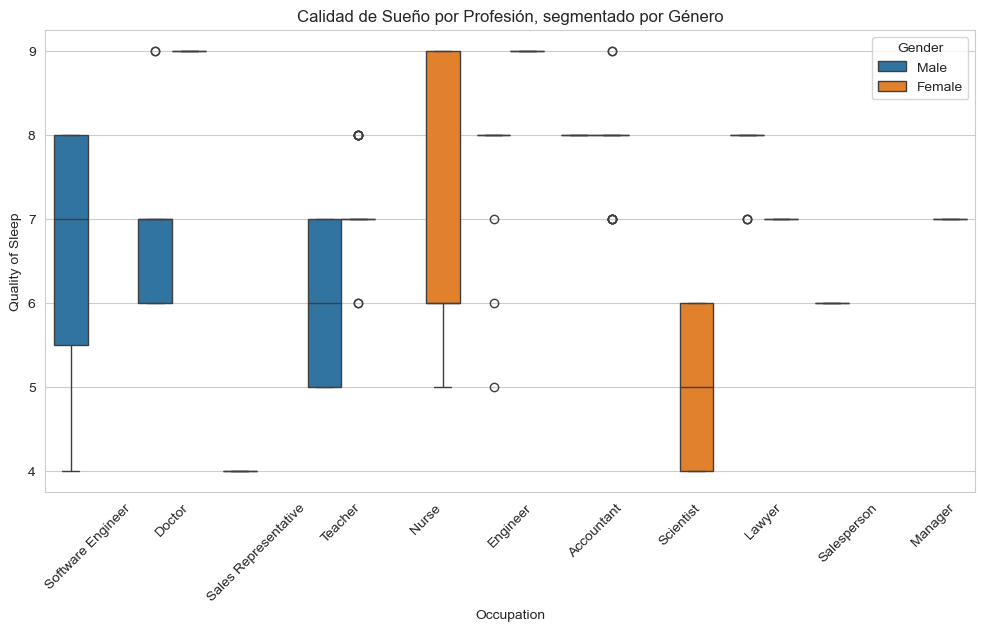

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generaré un gráfico para ver la diferencia en calidad de sueño y saber si está dominada por un género o por un rango de estrés.
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Occupation', y='Quality of Sleep', hue='Gender')  # O hue='StressCategory'
plt.title('Calidad de Sueño por Profesión, segmentado por Género')
plt.xticks(rotation=45)
plt.show()


In [126]:
df.groupby(['Occupation','Gender'])['Quality of Sleep'].mean().sort_values()


Occupation            Gender
Sales Representative  Male      4.000000
Scientist             Female    5.000000
Salesperson           Male      6.000000
Teacher               Male      6.000000
Software Engineer     Male      6.500000
Doctor                Male      6.579710
Lawyer                Female    7.000000
Manager               Female    7.000000
Teacher               Female    7.114286
Nurse                 Female    7.369863
Engineer              Male      7.806452
Accountant            Female    7.888889
Lawyer                Male      7.933333
Accountant            Male      8.000000
Doctor                Female    9.000000
Engineer              Female    9.000000
Name: Quality of Sleep, dtype: float64

# Conclusión para ¿Existe una relación entre la calidad del sueño de las personas y su profesión?
## Con esta agrupación, se concluye que los hombres que son Sales Representatives y las mujeres que son Scientists tienen la peor calidad de sueño en el dataset (promedio de 4.0).

In [131]:
df[['Physical Activity Level', 'Sleep Duration', 'Quality of Sleep']].corr()


,Physical Activity Level,Sleep Duration,Quality of Sleep
Physical Activity Level,1.000000,0.212360,0.192896
Sleep Duration,0.212360,1.000000,0.883213
Quality of Sleep,0.192896,0.883213,1.000000


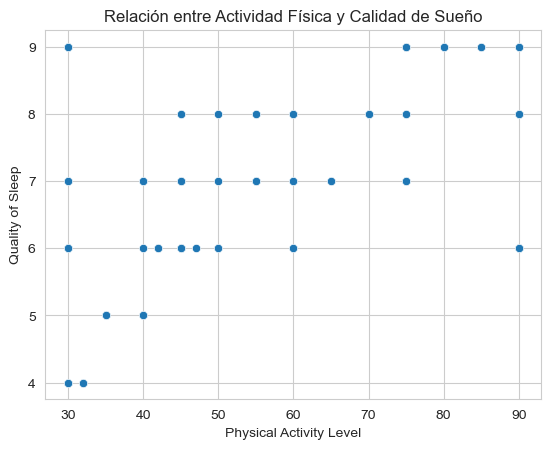

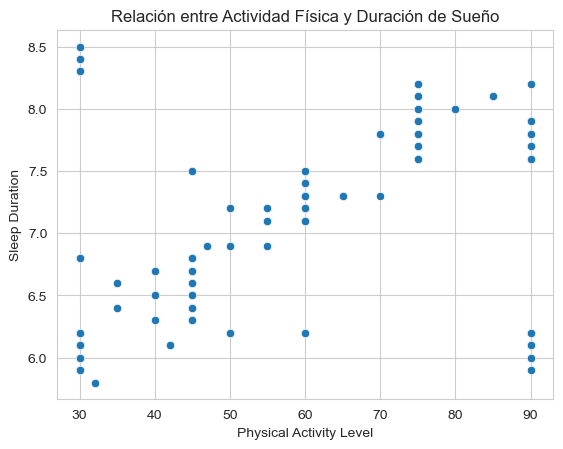

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='Physical Activity Level', y='Quality of Sleep')
plt.title("Relación entre Actividad Física y Calidad de Sueño")
plt.show()

sns.scatterplot(data=df, x='Physical Activity Level', y='Sleep Duration')
plt.title("Relación entre Actividad Física y Duración de Sueño")
plt.show()



# Conclusión: La actividad física afecta al sueño?
## Mientras la actividad física no parece influir demasiado en la duración del sueño (correlación muy baja), sí presenta una relación positiva con la calidad de sueño. Las personas con mayor nivel de actividad física suelen reportar mejor calidad de sueño, aunque no necesariamente duermen más horas.

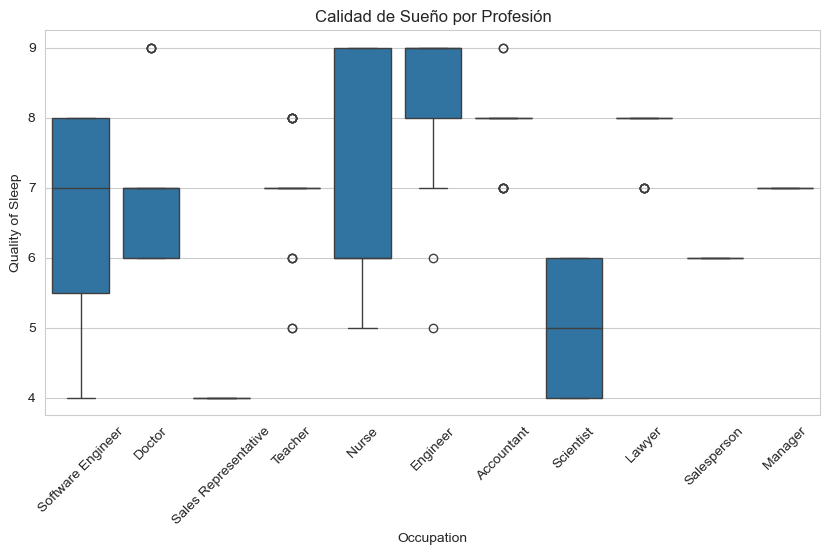

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Occupation', y='Quality of Sleep')
plt.title('Calidad de Sueño por Profesión')
plt.xticks(rotation=45)
plt.show()


In [150]:
# Mediana de la calidad de sueño por profesión
df.groupby('Occupation')['Quality of Sleep'].median().sort_values()

Occupation
Sales Representative    4.0
Scientist               5.0
Nurse                   6.0
Salesperson             6.0
Doctor                  7.0
Manager                 7.0
Software Engineer       7.0
Teacher                 7.0
Accountant              8.0
Lawyer                  8.0
Engineer                9.0
Name: Quality of Sleep, dtype: float64

# conclusión: ¿Qué profesión presenta la peor calidad de sueño? 
## A partir de la mediana y el gráfico, se puede obserar que los Sales Representative en general tienen la peor calidad de sueño.

In [165]:
df_obese = df[df['BMI Category'] == 'Obese']
obese_count = df_obese.groupby('Occupation').size().sort_values(ascending=False)
obese_count


Occupation
Doctor                  4
Lawyer                  2
Sales Representative    2
Software Engineer       1
Teacher                 1
dtype: int64

In [167]:
mapping_bmi = {
    'Underweight': 1,
    'Normal': 2,
    'Overweight': 3,
    'Obese': 4
}

df['BMI Numeric'] = df['BMI Category'].map(mapping_bmi)


In [169]:
df.groupby('Occupation')['BMI Numeric'].mean().sort_values(ascending=False)


Occupation
Sales Representative    4.000000
Software Engineer       3.500000
Manager                 3.000000
Nurse                   3.000000
Salesperson             3.000000
Scientist               3.000000
Teacher                 2.875000
Accountant              2.187500
Lawyer                  2.130435
Doctor                  2.115942
Engineer                2.050847
Name: BMI Numeric, dtype: float64

In [171]:
df_obese_high_stress = df[(df['BMI Category'] == 'Obese') & (df['Stress Level'] > 7)]
df_obese_high_stress.groupby('Occupation').size().sort_values(ascending=False)


Occupation
Sales Representative    2
Software Engineer       1
dtype: int64

In [173]:
df['Stress_BMI_Sum'] = df['Stress Level'] + df['BMI Numeric']
stats_prof = df.groupby('Occupation')['Stress_BMI_Sum'].mean().sort_values(ascending=False)
stats_prof


Occupation
Sales Representative    12.000000
Software Engineer       10.500000
Salesperson             10.000000
Scientist               10.000000
Doctor                   8.956522
Nurse                    8.500000
Manager                  8.000000
Teacher                  7.400000
Lawyer                   7.173913
Accountant               6.750000
Engineer                 5.847458
Name: Stress_BMI_Sum, dtype: float64

# Conclusión: ¿Cuál profesión tienen las personas con el mayor nivel de estrés y el mayor índice de masa corporal?
## Sales Representative es la profesión con el promedio más alto de Stress Level + BMI, además de presentar el mayor número de personas obesas y el mayor BMI numérico en promedio.


In [204]:
# Filtrar quienes tienen un trastorno
df_disorder = df[df['Sleep Disorder'] != 'No disorder'] 

# Crear bins de edades (por ejemplo, de 10 en 10 años)
bins = [0, 20, 30, 40, 50, 60, 70, 100]
labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']

df_disorder = df[df['Sleep Disorder'] != 'No disorder'].copy()

# Se crea la columna AgeRange
df_disorder['AgeRange'] = pd.cut(df_disorder['Age'], bins=bins, labels=labels, right=False)


In [178]:
disorder_count = df_disorder.groupby('AgeRange').size().sort_values(ascending=False)
disorder_count


C:\Users\joisg\AppData\Local\Temp\ipykernel_21136\25760497.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disorder_count = df_disorder.groupby('AgeRange').size().sort_values(ascending=False)


AgeRange
40-50    75
50-60    58
30-40    15
20-30     7
0-20      0
60-70     0
70+       0
dtype: int64

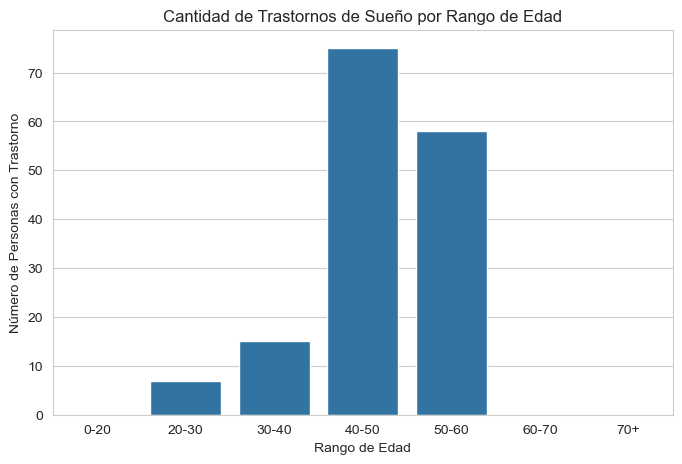

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=disorder_count.index, y=disorder_count.values)
plt.title("Cantidad de Trastornos de Sueño por Rango de Edad")
plt.xlabel("Rango de Edad")
plt.ylabel("Número de Personas con Trastorno")
plt.show()


# Conclusión: ¿En qué rango de edades se encuentran la mayor cantidad de trastornos del sueño?
## El rango de edad de 30 a 40 años es donde se concentra la mayor cantidad de trastornos del sueño

In [195]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# 1. Subset sin NaN ni infinitos
df_sub = df[['Daily Steps', 'Quality of Sleep']].copy()
df_sub = df_sub.replace([np.inf, -np.inf], np.nan).dropna()

# 2. Calcular la correlación
r_qos, p_value_qos = pearsonr(df_sub['Daily Steps'], df_sub['Quality of Sleep'])
print("Correlación (Daily Steps vs Quality of Sleep) =", r_qos, "p-value =", p_value_qos)



Correlación (Daily Steps vs Quality of Sleep) = 0.016791414924716756 p-value = 0.746190665296111


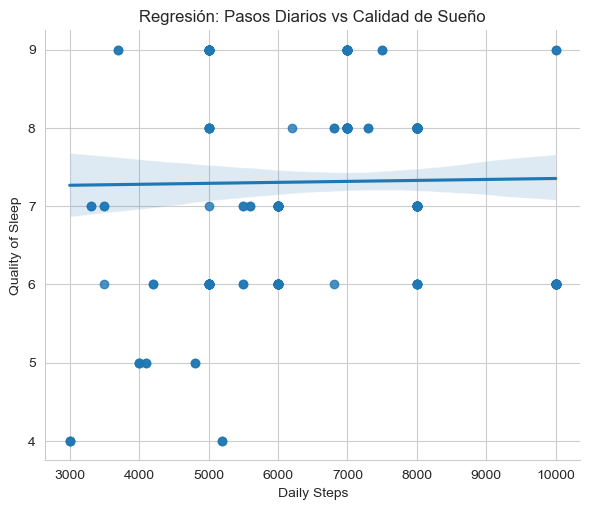

In [197]:
sns.lmplot(data=df_sub, x='Daily Steps', y='Quality of Sleep', aspect=1.2)
plt.title("Regresión: Pasos Diarios vs Calidad de Sueño")
plt.show()


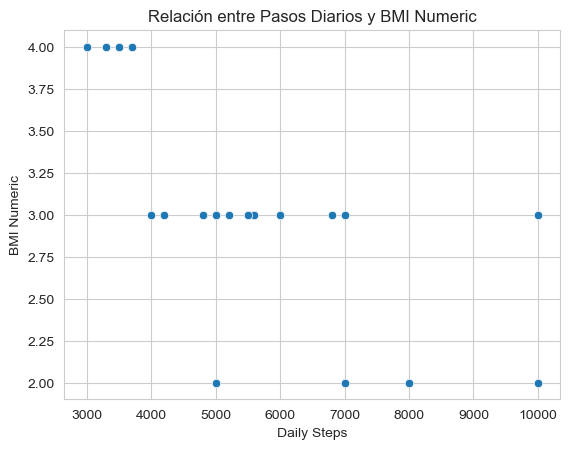

In [201]:
# Daily Steps vs BMI Numeric (si ya tienes BMI Numeric)
sns.scatterplot(data=df, x='Daily Steps', y='BMI Numeric')
plt.title("Relación entre Pasos Diarios y BMI Numeric")
plt.show()

# Conclusión: La cantidad de pasos al día, ¿afecta la calidad del sueño? ¿al índice de masa corporal? 
## Aunque la correlación es pequeña, se observa que quienes caminan más tienden a reportar una ligera mejora en su calidad de sueño. No obstante, no es un efecto muy fuerte, por lo que podrían existir otras variables más influyentes.
## el segundo gráfico sugiere una relación débil o casi nula entre pasos diarios e índice de masa corporal